# MammalMosaic A Diverse Classification Challenge
* 1.Blue whale
* 2.Elephant
* 3.Hippopotamus
* 4.Aardvark
* 5.Fox
* 6.Mountain gorilla
* 7.Sheep
* 8.African wild dog
* 9.Lion
* 10.Kangaroo
* 11.Armadillo
* 12.Meerkat
* 13.Panda
* 14.Cat
* 15.Bat
* 16.Mouse
* 17.Dolphin
* 18.Monkey
* 19.Pig
* 20.Wolf


In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size=20


In [ ]:
%cd /content/drive/MyDrive/MammalMosaic A Diverse Classification Challenge

/content/drive/MyDrive/MammalMosaic A Diverse Classification Challenge


In [ ]:
mammals_label=["Blue Whale",
    "Elephant",
    "Hippopotamus",
    "Aardvark",
    "Fox",
    "Mountain Gorilla",
    "Sheep",
    "African Wild Dog",
    "Lion",
    "Kangaroo",
    "Armadillo",
    "Meerkat",
    "Panda",
    "Cat",
    "Bat",
    "Mouse",
    "Dolphin",
    "Monkey",
    "Pig",
    "Wolf"]



print(f"Mammals Name : {mammals_label}")
print("########################################################")
print("########################################################")
print(f"Mammals Label Length : {len(mammals_label)}")

Mammals Name : ['Blue Whale', 'Elephant', 'Hippopotamus', 'Aardvark', 'Fox', 'Mountain Gorilla', 'Sheep', 'African Wild Dog', 'Lion', 'Kangaroo', 'Armadillo', 'Meerkat', 'Panda', 'Cat', 'Bat', 'Mouse', 'Dolphin', 'Monkey', 'Pig', 'Wolf']
########################################################
########################################################
Mammals Label Length : 20


In [ ]:
images = search_images_ddg(mammals_label[1])
print(f"Number of Images : {len(images)}")
print("==================================================================================================")
print(f"Image Url : {images[0]}")

Number of Images : 200
Image Url : https://images.news18.com/ibnlive/uploads/2022/06/untitled-design-2022-06-13t112236.905.png


In [ ]:
name="Elephant.jpg"
download_url(images[1],name,show_progress=True)

Path('Elephant.jpg')

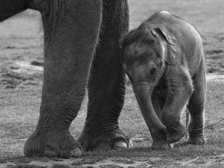

In [ ]:

image=Image.open(name)
image.to_thumb(224,224)


In [ ]:
data_path="my_data"
# if not os.path.exists(data_path):
#   os.mkdir(data_path)

# for mammal_type in mammals_label:
#   dest=f"{data_path}/{mammal_type}"
#   if not os.path.exists(dest):
#     os.mkdir(dest)

#   try:
#     mammal_image_urls=search_images_ddg(mammal_type)
#     download_images(dest,urls=mammal_image_urls)
#   except:
#     continue

In [ ]:
data_count=get_image_files(data_path)
data_count

(#3418) [Path('my_data/Blue Whale/c26eb3bf-803b-4116-a381-b8bdd95e0c28.jpg'),Path('my_data/Blue Whale/823c0d4e-124d-48ca-ae4a-7a95a0bacad1.jpg'),Path('my_data/Blue Whale/cf2d129f-b0b0-4999-b6c7-124899f28747.jpg'),Path('my_data/Blue Whale/628bb990-d804-4d5e-a246-5f08d611197c.jpg'),Path('my_data/Blue Whale/1c851a00-e92b-4f4d-88bc-e6aa8b68bff1.jpg'),Path('my_data/Blue Whale/05e928eb-f047-4a29-9de0-3afe9dec0b07.png'),Path('my_data/Blue Whale/3aa22582-2e31-4795-87a4-ee7997221b8f.jpg'),Path('my_data/Blue Whale/f470dc49-ba57-471f-8092-300a9b5fec97.jpg'),Path('my_data/Blue Whale/bed030f2-db34-44b1-ad6b-5d403f1fd915.jpg'),Path('my_data/Blue Whale/cee88499-d2d9-44d1-af38-0b6219de9df0.jpg')...]

In [ ]:
each_data_count = {label: len(get_image_files(f"{data_path}/{label}")) for label in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, label))}

# Print the count for each class
for label, count in each_data_count.items():
    print(f"{label}: {count} images")

Blue Whale: 167 images
Elephant: 171 images
Hippopotamus: 179 images
Aardvark: 160 images
Fox: 170 images
Mountain Gorilla: 183 images
Sheep: 168 images
African Wild Dog: 180 images
Lion: 161 images
Kangaroo: 175 images
Armadillo: 170 images
Meerkat: 184 images
Panda: 171 images
Cat: 167 images
Bat: 163 images
Mouse: 181 images
Dolphin: 163 images
Monkey: 168 images
Pig: 171 images
Wolf: 166 images


In [ ]:
fail=verify_images(data_count)
fail

(#0) []

In [ ]:
fail.map(Path.unlink)

(#0) []

# Data Loaders

In [ ]:
data_block=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2,seed=42),
                     get_y=parent_label,
                     item_tfms=Resize(128))

In [ ]:
dls=data_block.dataloaders(data_path,bs=batch_size)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


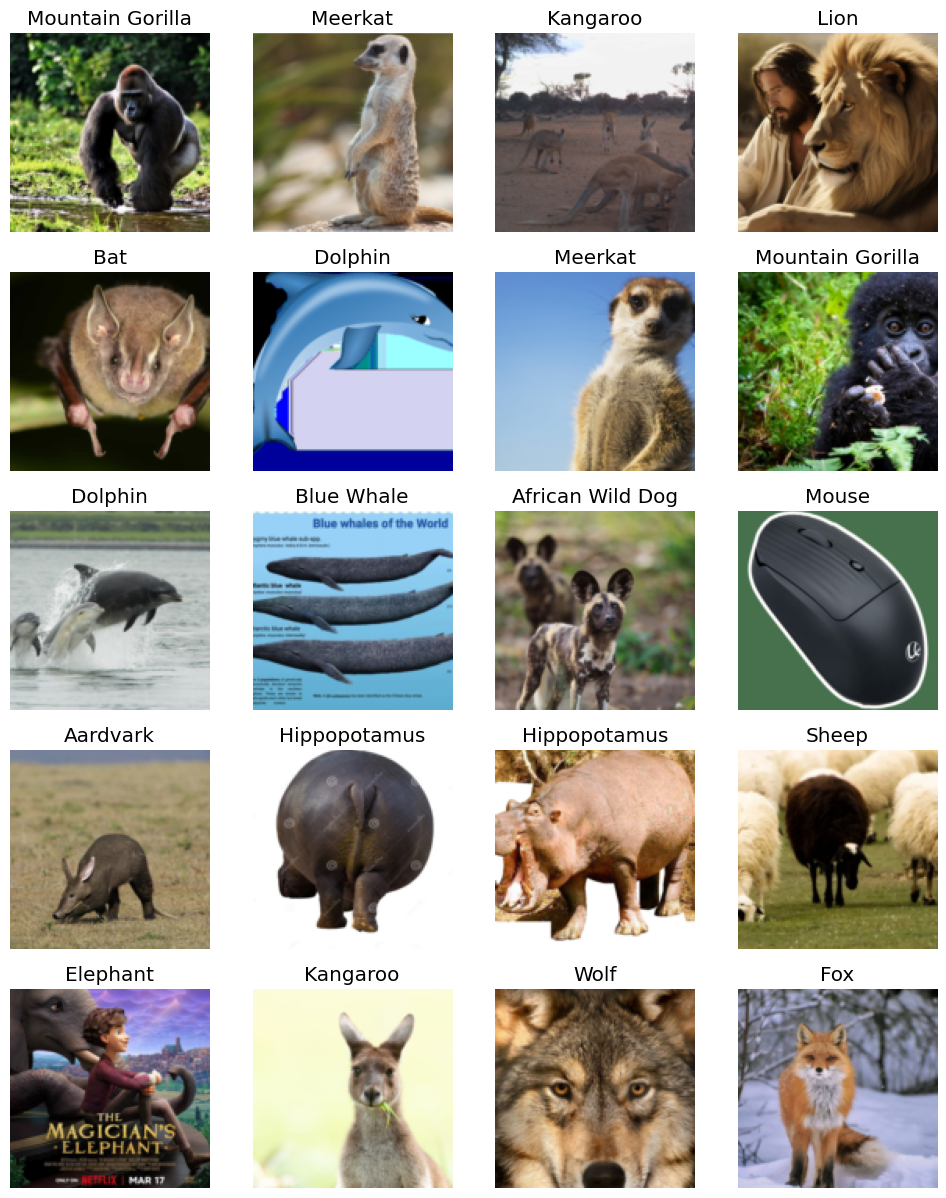

In [ ]:
dls.train.show_batch(max_n=25,nrows=5)

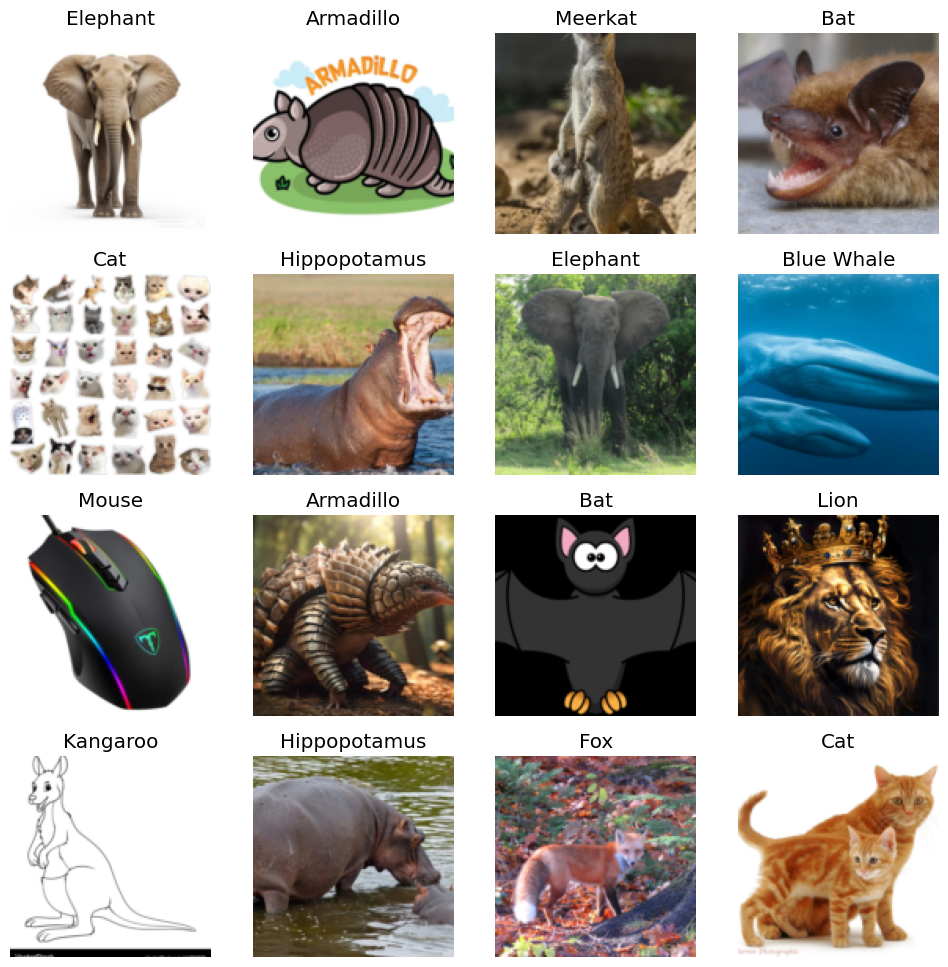

In [ ]:
dls.valid.show_batch(max_n=16,nrows=4)

# Data Augmentation

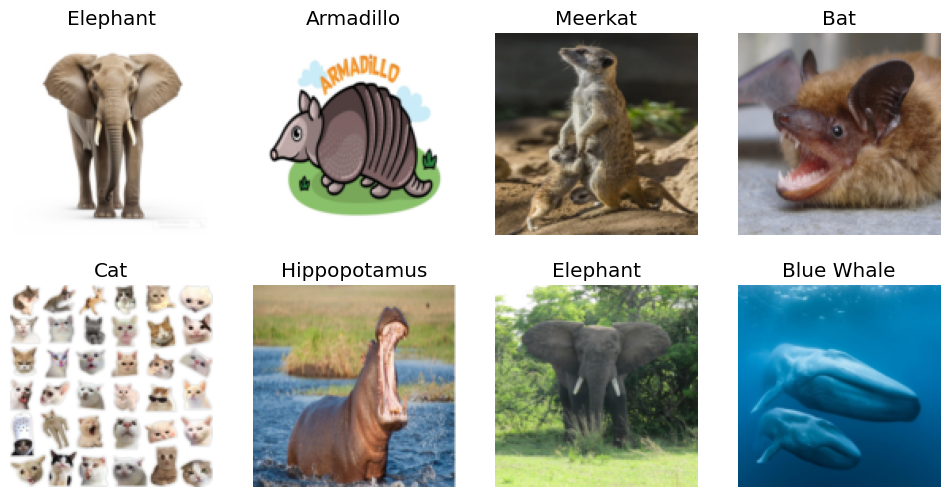

In [ ]:
dblock = data_block.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

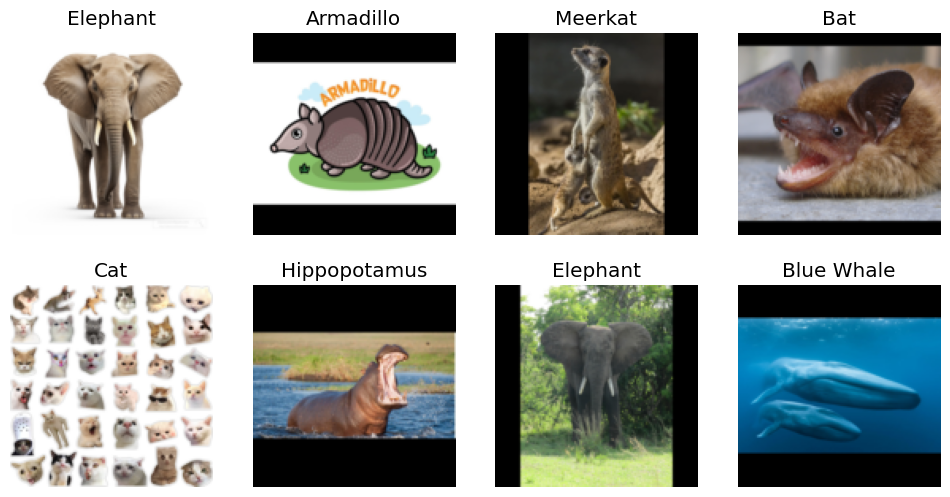

In [ ]:
dblock = data_block.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

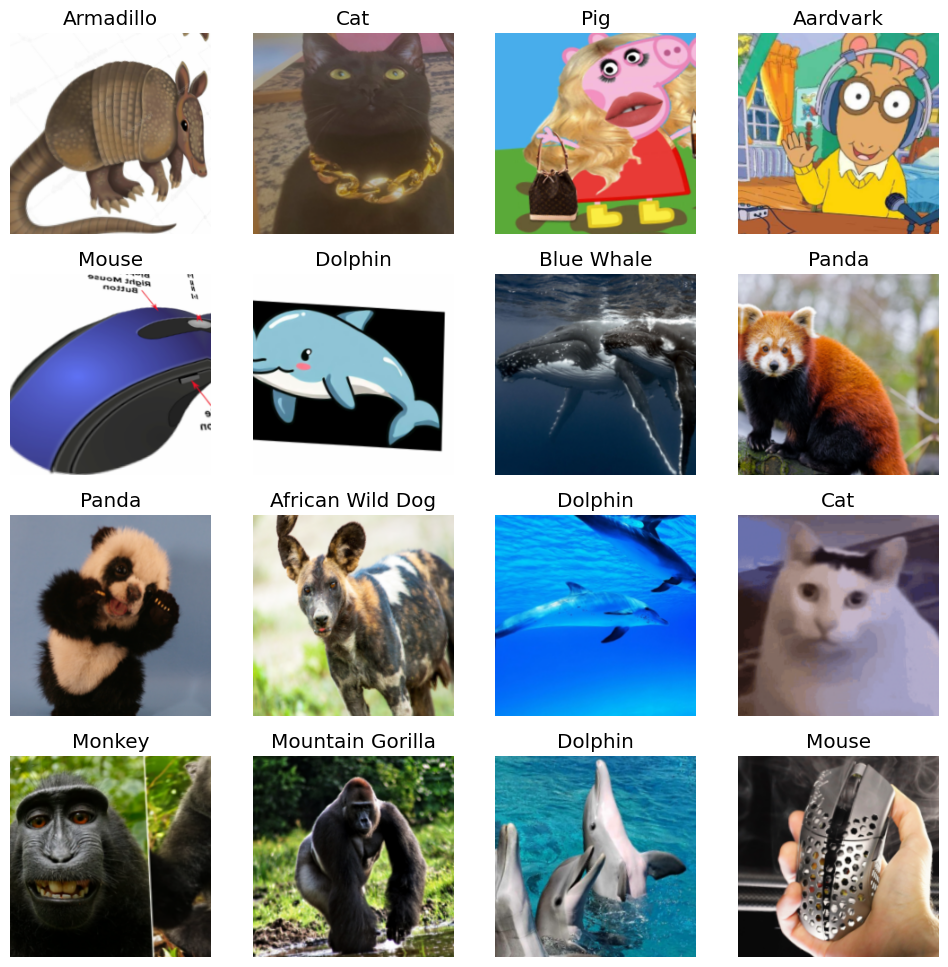

In [ ]:
dblock = data_block.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
dls.train.vocab

['Aardvark', 'African Wild Dog', 'Armadillo', 'Bat', 'Blue Whale', 'Cat', 'Dolphin', 'Elephant', 'Fox', 'Hippopotamus', 'Kangaroo', 'Lion', 'Meerkat', 'Monkey', 'Mountain Gorilla', 'Mouse', 'Panda', 'Pig', 'Sheep', 'Wolf']

In [ ]:
from fastai.vision.widgets import *
model_path = "models"
model = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

In [ ]:
model.fine_tune(5)

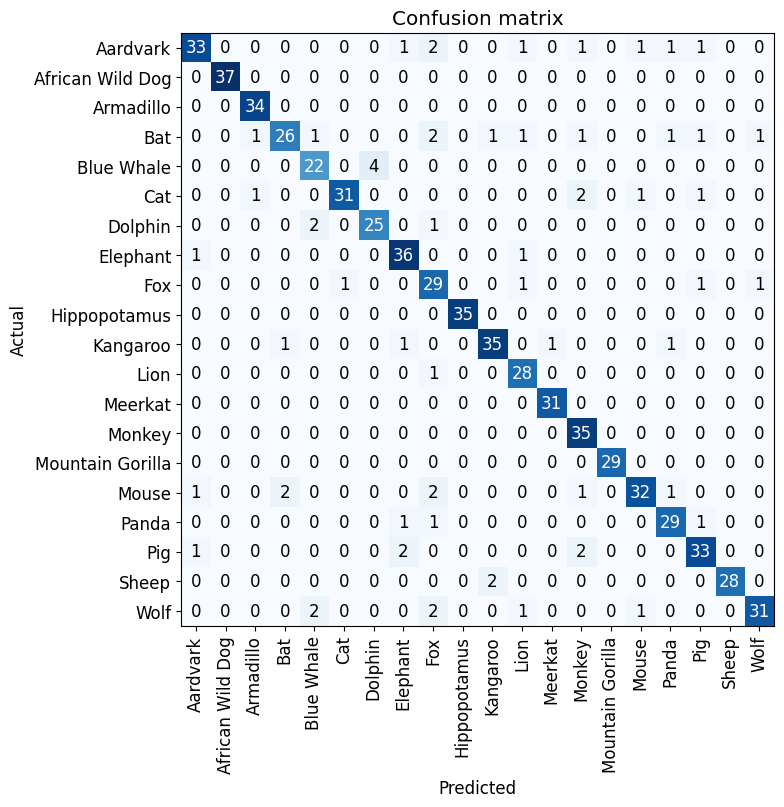

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(8,8))

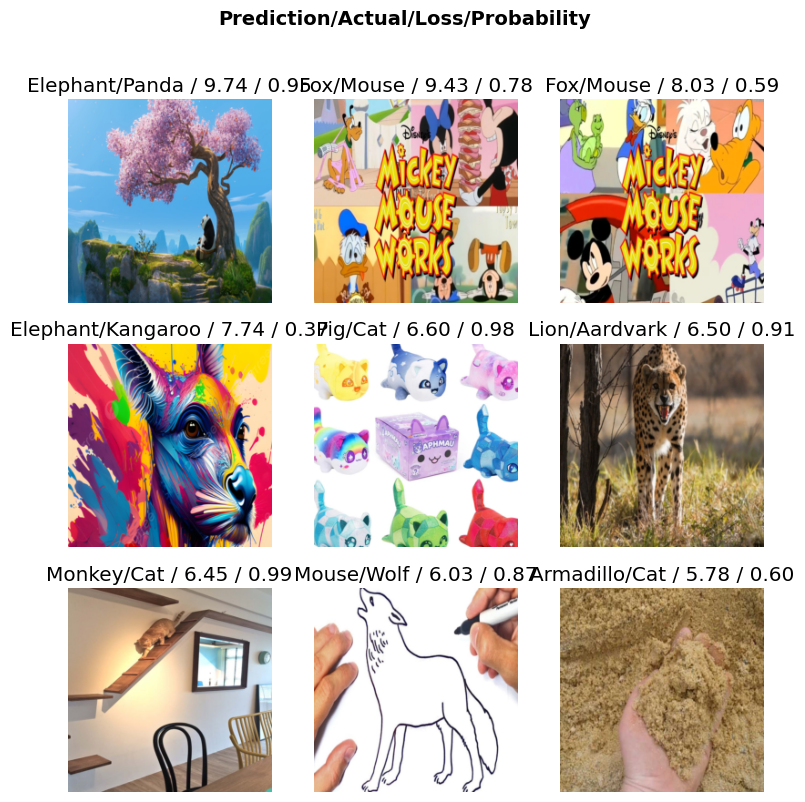

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
cleaner.delete()

(#0) []

In [ ]:
cleaner.change()

(#0) []

# Export model for inference

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [ ]:
model.export(f"{model_path}/mammal_model.pkl")

In [ ]:
test_image_path="test_image"
model_path_pred=f"models/mammal_model.pkl"
model=load_learner(model_path_pred)

# Prediction_1

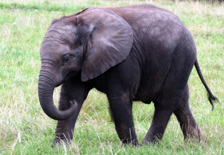

In [ ]:
img=Image.open(f"{test_image_path}/image_1.jpg")
img.to_thumb(224,224)

In [ ]:
model.predict(f'{test_image_path}/image_1.jpg')

('Elephant',
 tensor(7),
 tensor([1.4326e-04, 9.5949e-06, 2.3157e-05, 3.6709e-06, 2.1197e-05, 1.7761e-05, 2.7929e-06, 9.9946e-01, 1.1780e-05, 4.6781e-05, 3.0500e-07, 7.6420e-07, 2.3423e-06, 1.6281e-06, 1.8335e-04, 3.5679e-05,
         1.4999e-06, 7.5302e-06, 2.2606e-05, 3.8743e-06]))

# Prediction_2

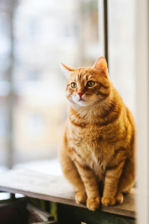

In [ ]:
img=Image.open(f"{test_image_path}/image_2.jpg")
img.to_thumb(224,224)

In [ ]:
model.predict(f'{test_image_path}/image_2.jpg')

('Cat',
 tensor(5),
 tensor([1.2715e-08, 2.9709e-08, 5.7009e-08, 2.7250e-09, 2.0601e-09, 9.9999e-01, 5.9675e-08, 8.9277e-09, 3.0978e-08, 3.4131e-08, 6.8319e-09, 4.1133e-06, 1.0470e-07, 4.1717e-07, 6.0973e-08, 1.0407e-07,
         4.6877e-09, 5.1736e-08, 4.5619e-08, 4.3158e-07]))

# Prediction_3

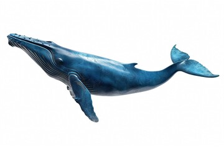

In [ ]:
img=Image.open(test_image_path+"/image_3.jpg")
img.to_thumb(224,224)

In [ ]:
model.predict(f'{test_image_path}/image_3.jpg')

('Blue Whale',
 tensor(4),
 tensor([1.7074e-02, 9.4748e-05, 2.8878e-04, 2.5748e-03, 9.7824e-01, 1.1237e-04, 7.3180e-04, 9.0558e-05, 2.3684e-06, 1.0268e-04, 8.6331e-05, 1.2033e-05, 2.0880e-05, 1.2232e-05, 4.7825e-04, 2.2352e-05,
         2.1261e-05, 2.8480e-05, 4.5357e-06, 2.3938e-06]))